In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', font_scale=2, palette='viridis_r')

In [2]:
path = 'FIFA Dataset.csv'
FIFA = pd.read_csv(path)

# Before visualizing our data, let's have a general overview

In [3]:
FIFA.shape

(17588, 53)

In [4]:
FIFA.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [5]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

In [6]:
# Casting height and weight columns into int
FIFA['Height'] = FIFA['Height'].str.replace(' cm', '').astype(int)
FIFA['Weight'] = FIFA['Weight'].str.replace(' kg', '').astype(int)

# Visualization starts here...

## Players ratings depending on their height and weight

<AxesSubplot:xlabel='Height', ylabel='Weight'>

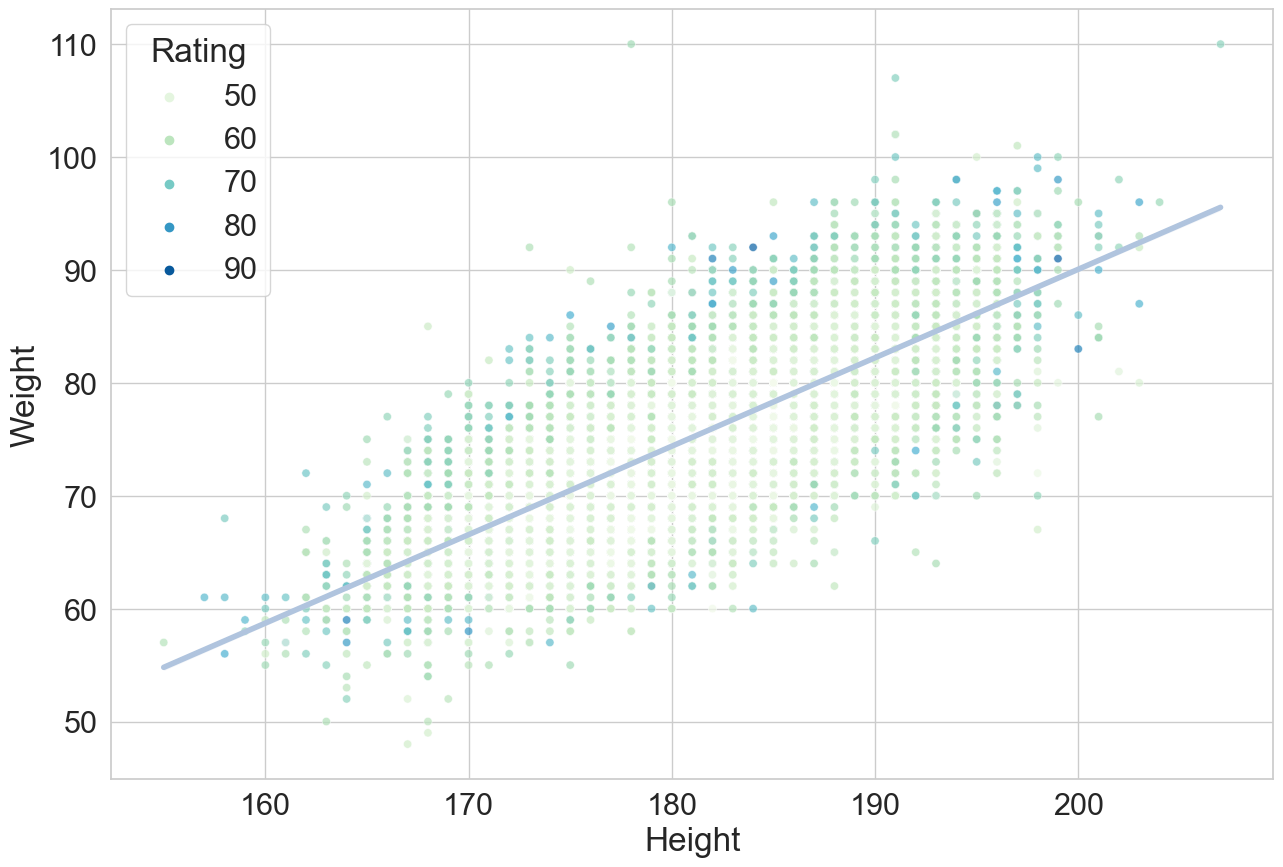

In [7]:
plt.subplots(figsize=(15, 10))
sns.scatterplot(data=FIFA, x='Height', y='Weight', hue='Rating', palette='GnBu', alpha=.7)
sns.regplot(data=FIFA, x='Height', y='Weight', scatter=False, color='#B0C4DE', line_kws={'linewidth': 4})

Globally, players height and weight are positively correlated. Furthermore, the subtle gradient around the regression line suggest that some ellipses having the regression line as major axis can be used to estimate a player's rating. The larger the minor axis, the more likely the player is to have a great rating.

## Rating distribution based on the preffered foot

<AxesSubplot:xlabel='Rating', ylabel='Count'>

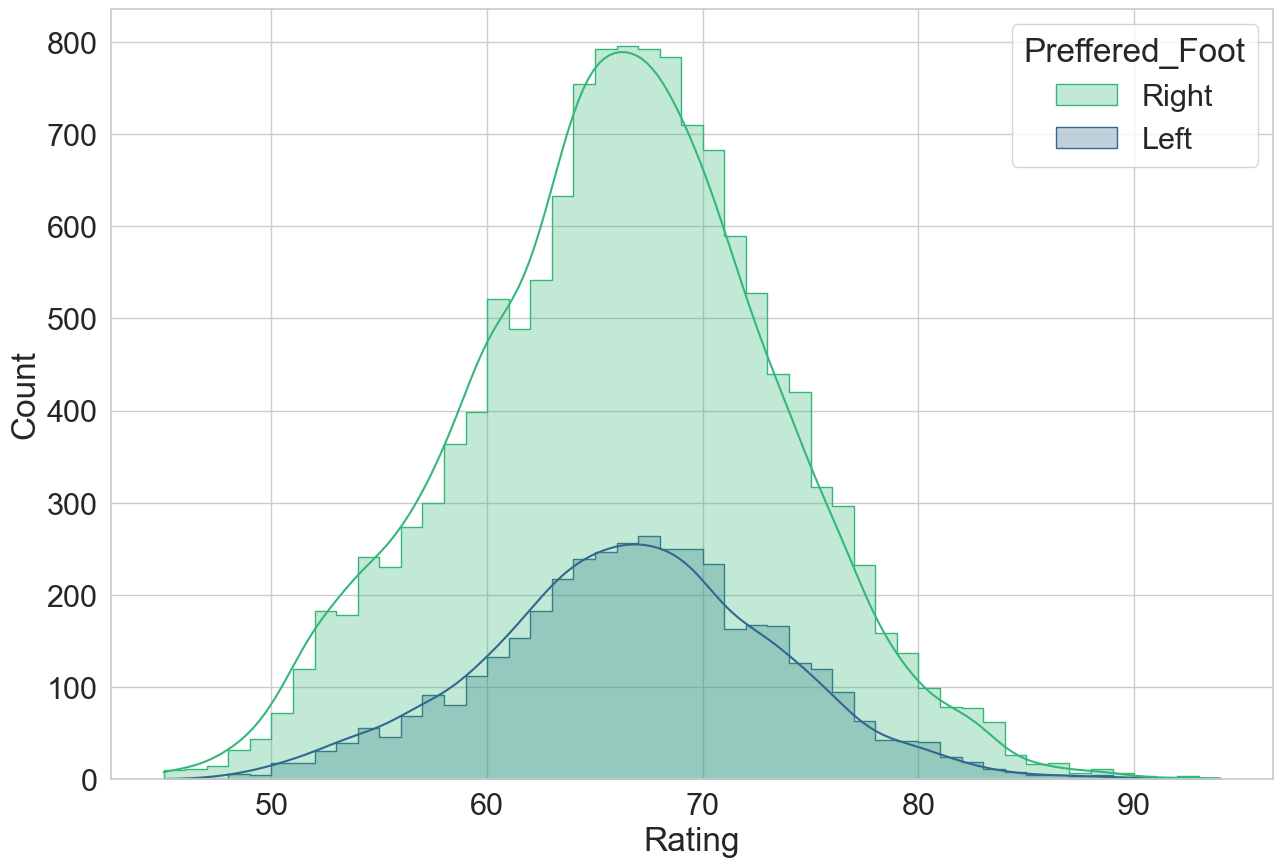

In [8]:
plt.subplots(figsize=(15, 10))
sns.histplot(data=FIFA, x='Rating', hue='Preffered_Foot', kde=True, element='step', multiple='layer', binwidth=1, alpha=.3, palette='viridis_r')

According to these overlaid histograms, left-handed players represents around 20 and 25% of the entire dataset and ratings seems to be normally distributed, with a mean around 68, regardless of the players preferred foot.

The ratings lower bound is established around 45 and the upper one near 95. 

Considering the third statement of the empirical rule which predicts that 99.7% of observations falls within the first three standard deviations, we can make the hypothesis of a standard deviation around $\frac{68\,-\,45}{3} \approx 7.67$.

So, we come up with this hypothesis: $rating \sim \mathcal{N}(68,\,7.67)$

## Goal keepers' skills (GK skills)

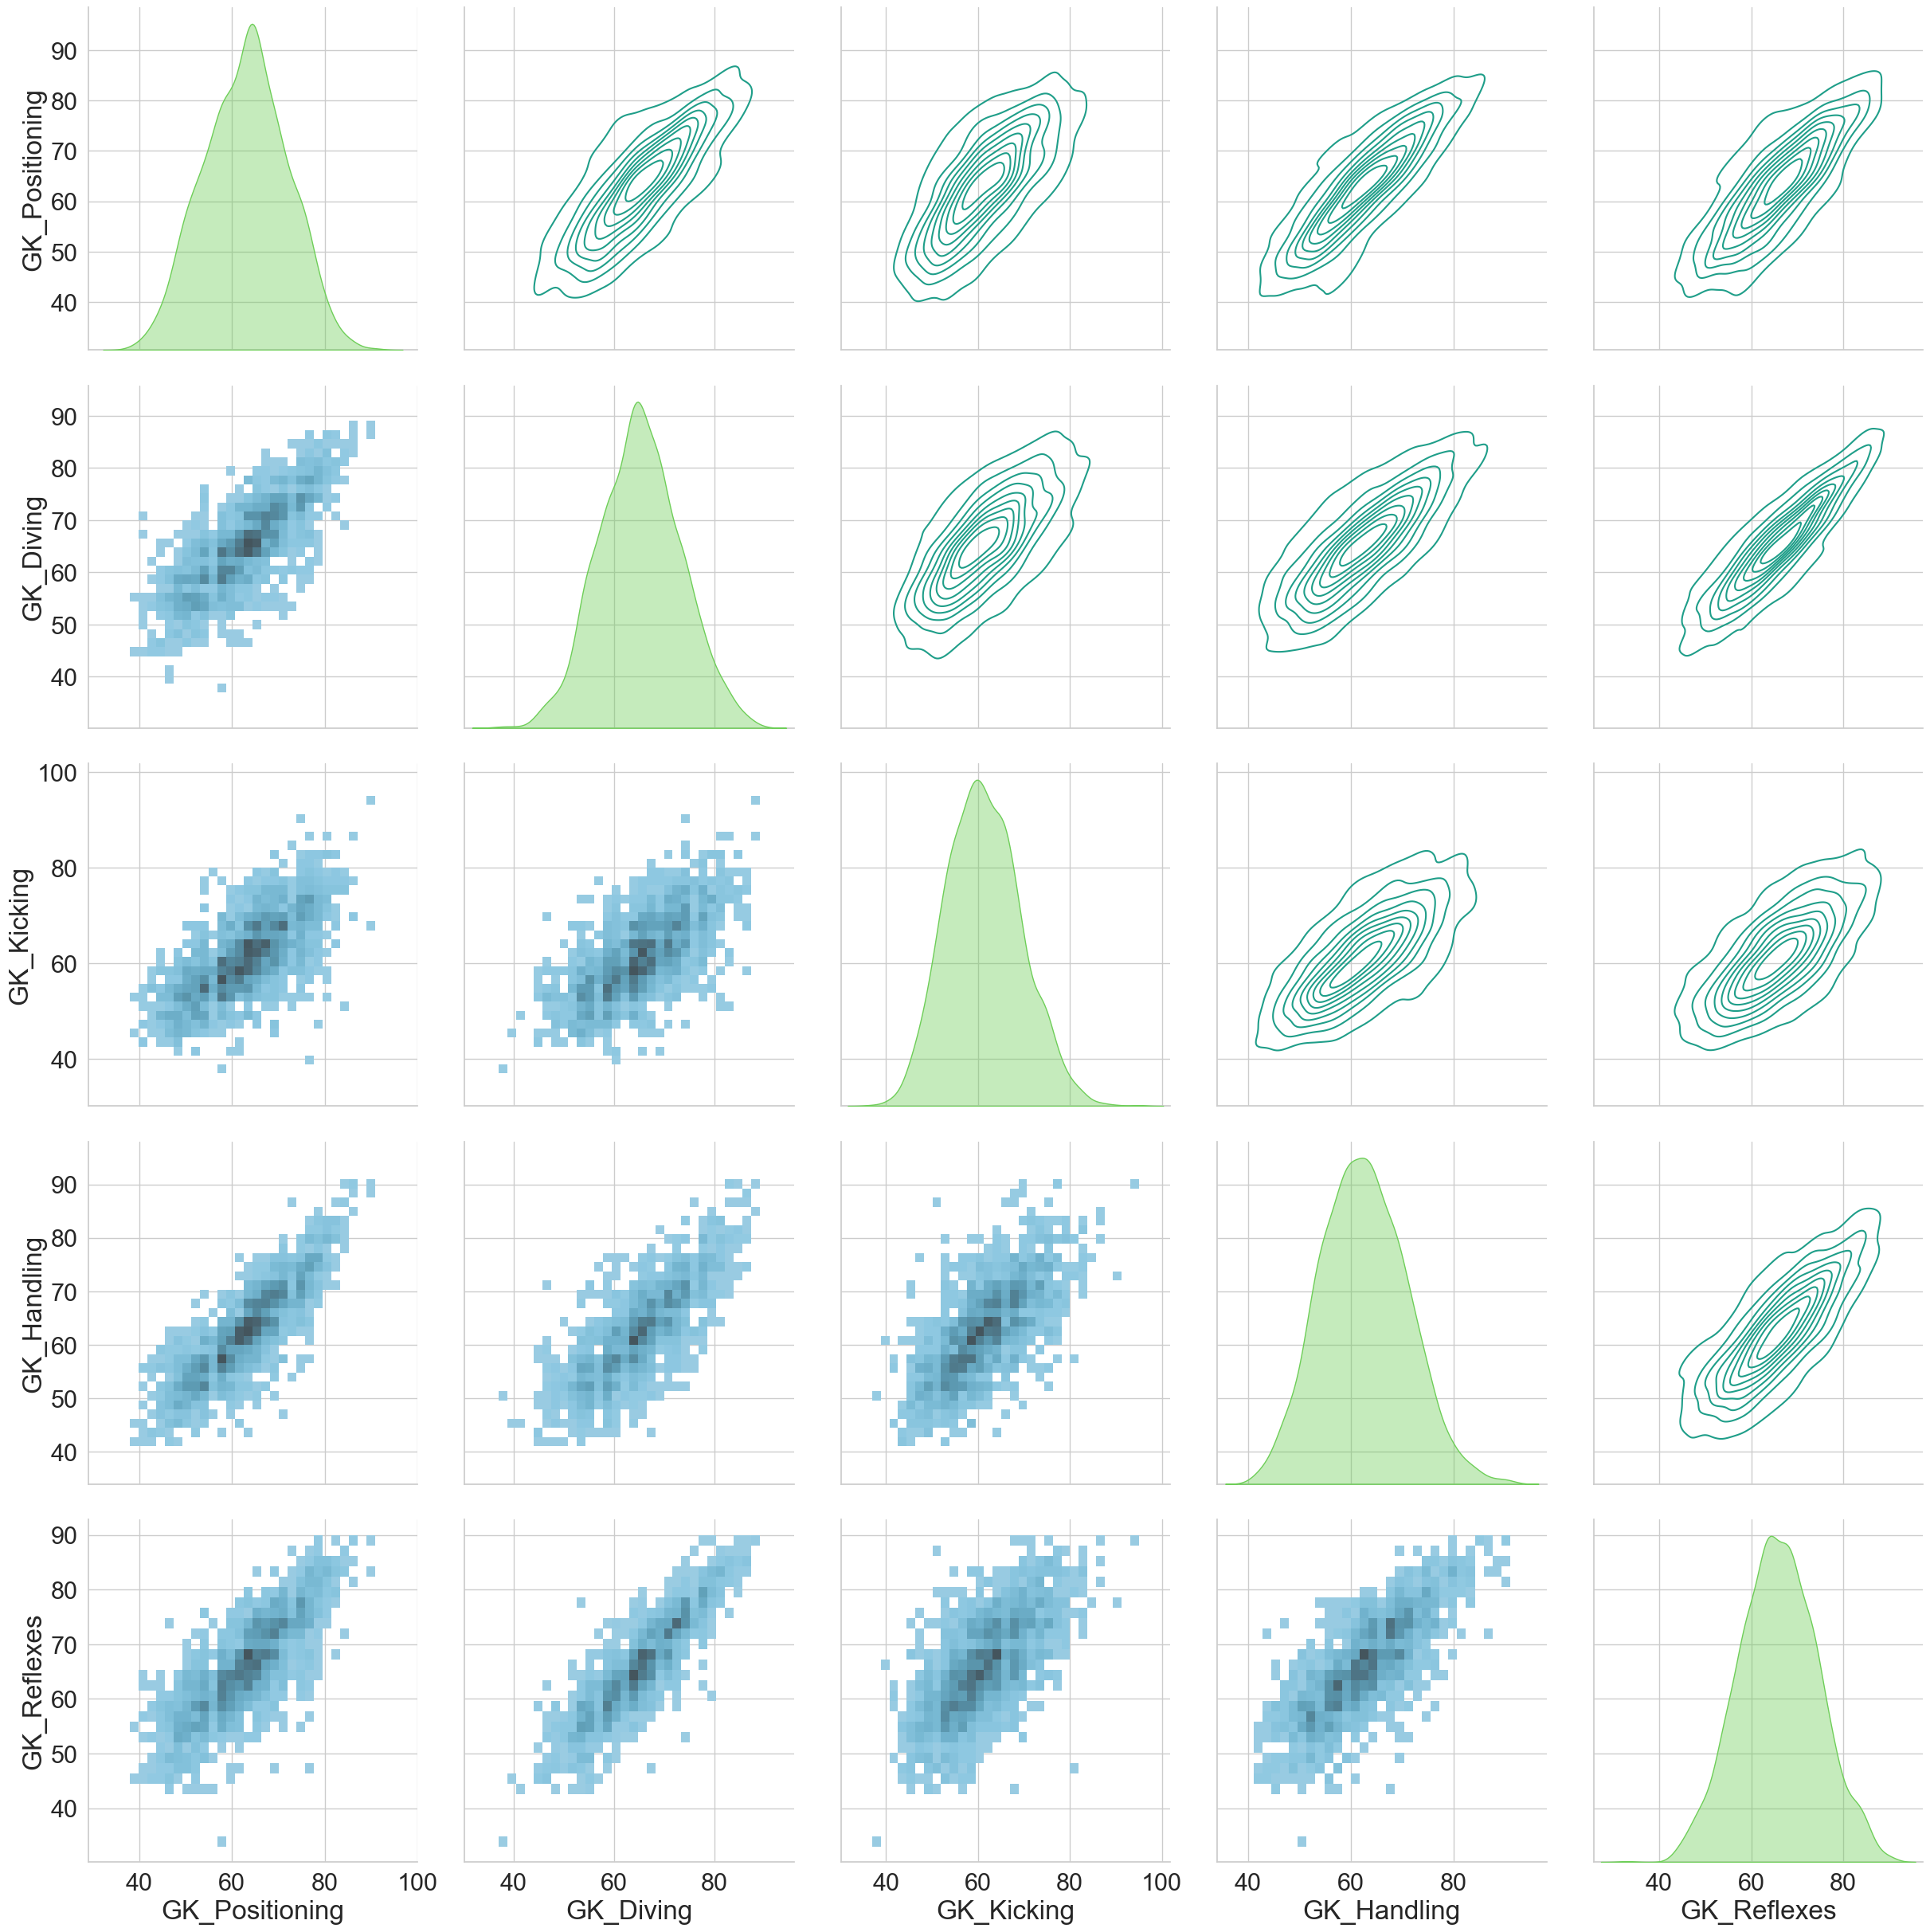

In [9]:
GK = FIFA[FIFA['Preffered_Position'] == 'GK']
GK_skills = ['GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes']

g = sns.PairGrid(data=GK, vars=GK_skills, diag_sharey=False, height=5)
g.map_lower(sns.histplot, color='#87CEEB')
g.map_diag(sns.kdeplot, fill=True, color='#6ECE58', alpha=.4)
g.map_upper(sns.kdeplot, color='#1F9E89')

The previous grid summarises goal keepers' skills (the analysis has been restricted to GK for relevance purposes). Two principal facts are highlighted:

- Each GK skill appears to be normally distributed with almost values in range \[30, 90\].

- All GK skills are positively correlated. A deeper analysis could tell us wether the skills evolve together for a single GK or they may move on differently, meaning that each GK has its strengths and weaknesses, but the fact that they don't all focus on the same skill creates the overall balance observed.

## Making the best with the worst

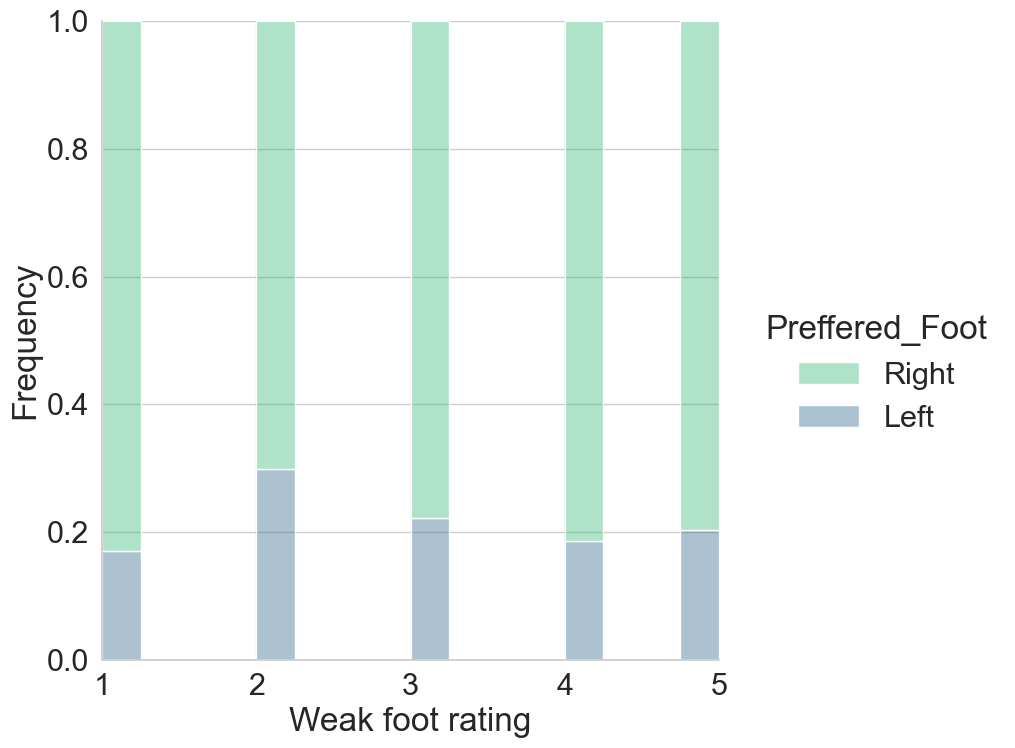

In [10]:
g = sns.displot(data=FIFA, x='Weak_foot', hue='Preffered_Foot', palette='viridis_r', multiple='fill', height=8, alpha=.4)
g.set_axis_labels('Weak foot rating', 'Frequency')

Here we wanted to answer the following question: which of the left or right-handed players perform better with their weak foot?

The distribution plot above shows that none of the two groups stand out in particular, since the 20/80 ratio - which may be the actual ratio among left and right-handed in the dataset - is almost respected. There's no real upward or downward trend when the weak foot rating moves.

## Clubs evaluation

For this section, a new statistic is computed: we associate to each club, the rating average of its players.

In [11]:
club_ratings = FIFA[['Club', 'Rating']].groupby('Club').mean('Rating')

### Club rating average distribution

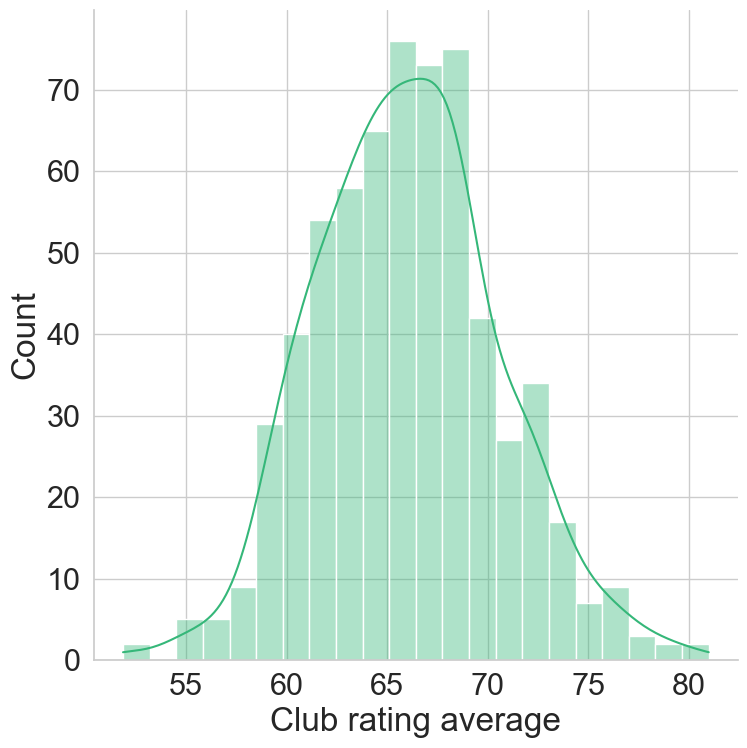

In [12]:
g = sns.displot(data=club_ratings, x='Rating', kde=True, color='#35B779', alpha=.4, height=8)
g.set_axis_labels('Club rating average', 'Count')

We're going to create 3 club clusters depending on their rating average:

- Group 1 - rating average >= 72

- Group 2 - rating average in \[60, 72[

- Group 3 - rating average < 60

In [13]:
club_ratings['Club_Group'] = 1
club_ratings.loc[club_ratings.Rating < 72, 'Club_Group'] = 2
club_ratings.loc[club_ratings.Rating < 60, 'Club_Group'] = 3
club_ratings.drop('Rating', axis=1, inplace=True)
FIFA = FIFA.merge(club_ratings, left_on='Club', right_on='Club')

### Age vs. rating average scatterplot

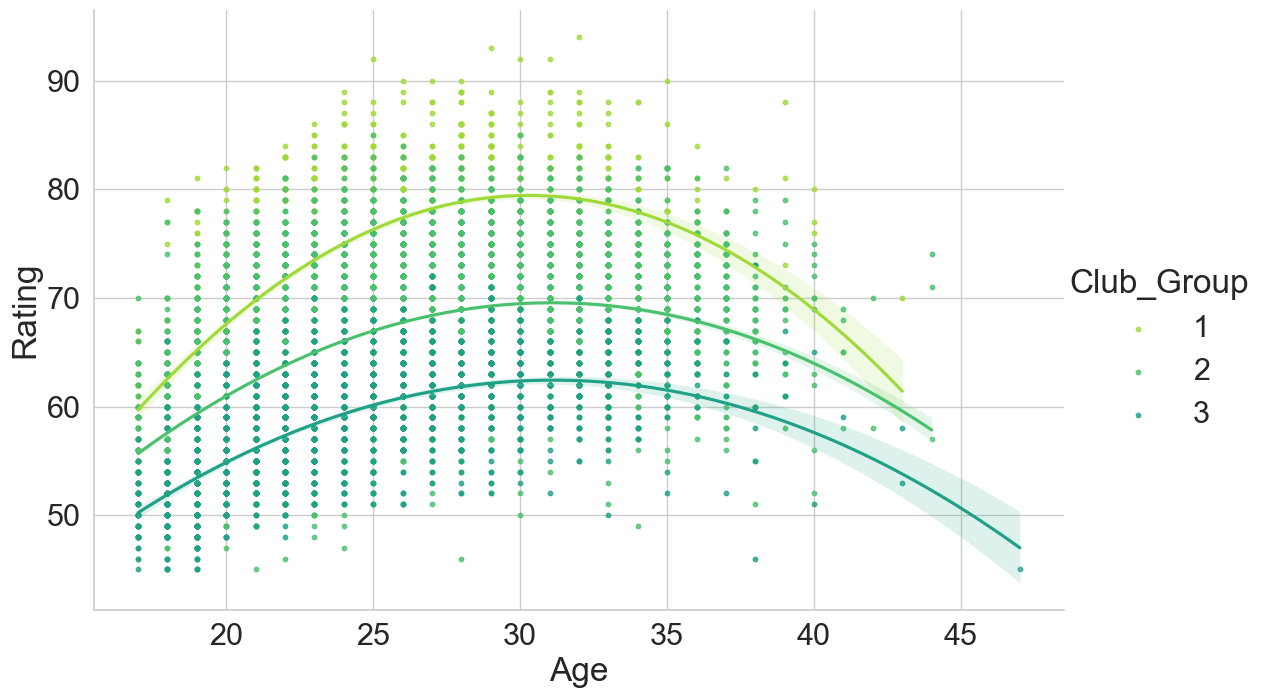

In [14]:
sns.lmplot(data=FIFA, x='Age', y='Rating', order=2, hue='Club_Group', height=7.5, aspect=1.5, scatter_kws={'s': 10})

The scatterplot above suggests a quadratic relationship between a player's age and its performance level; globally, the performance increases until 30 years old and then starts going down. Another remark is that whatever their age, the best players are in the best teams.

### What makes some teams better than the others?

<AxesSubplot:xlabel='Club_Group', ylabel='Jumping'>

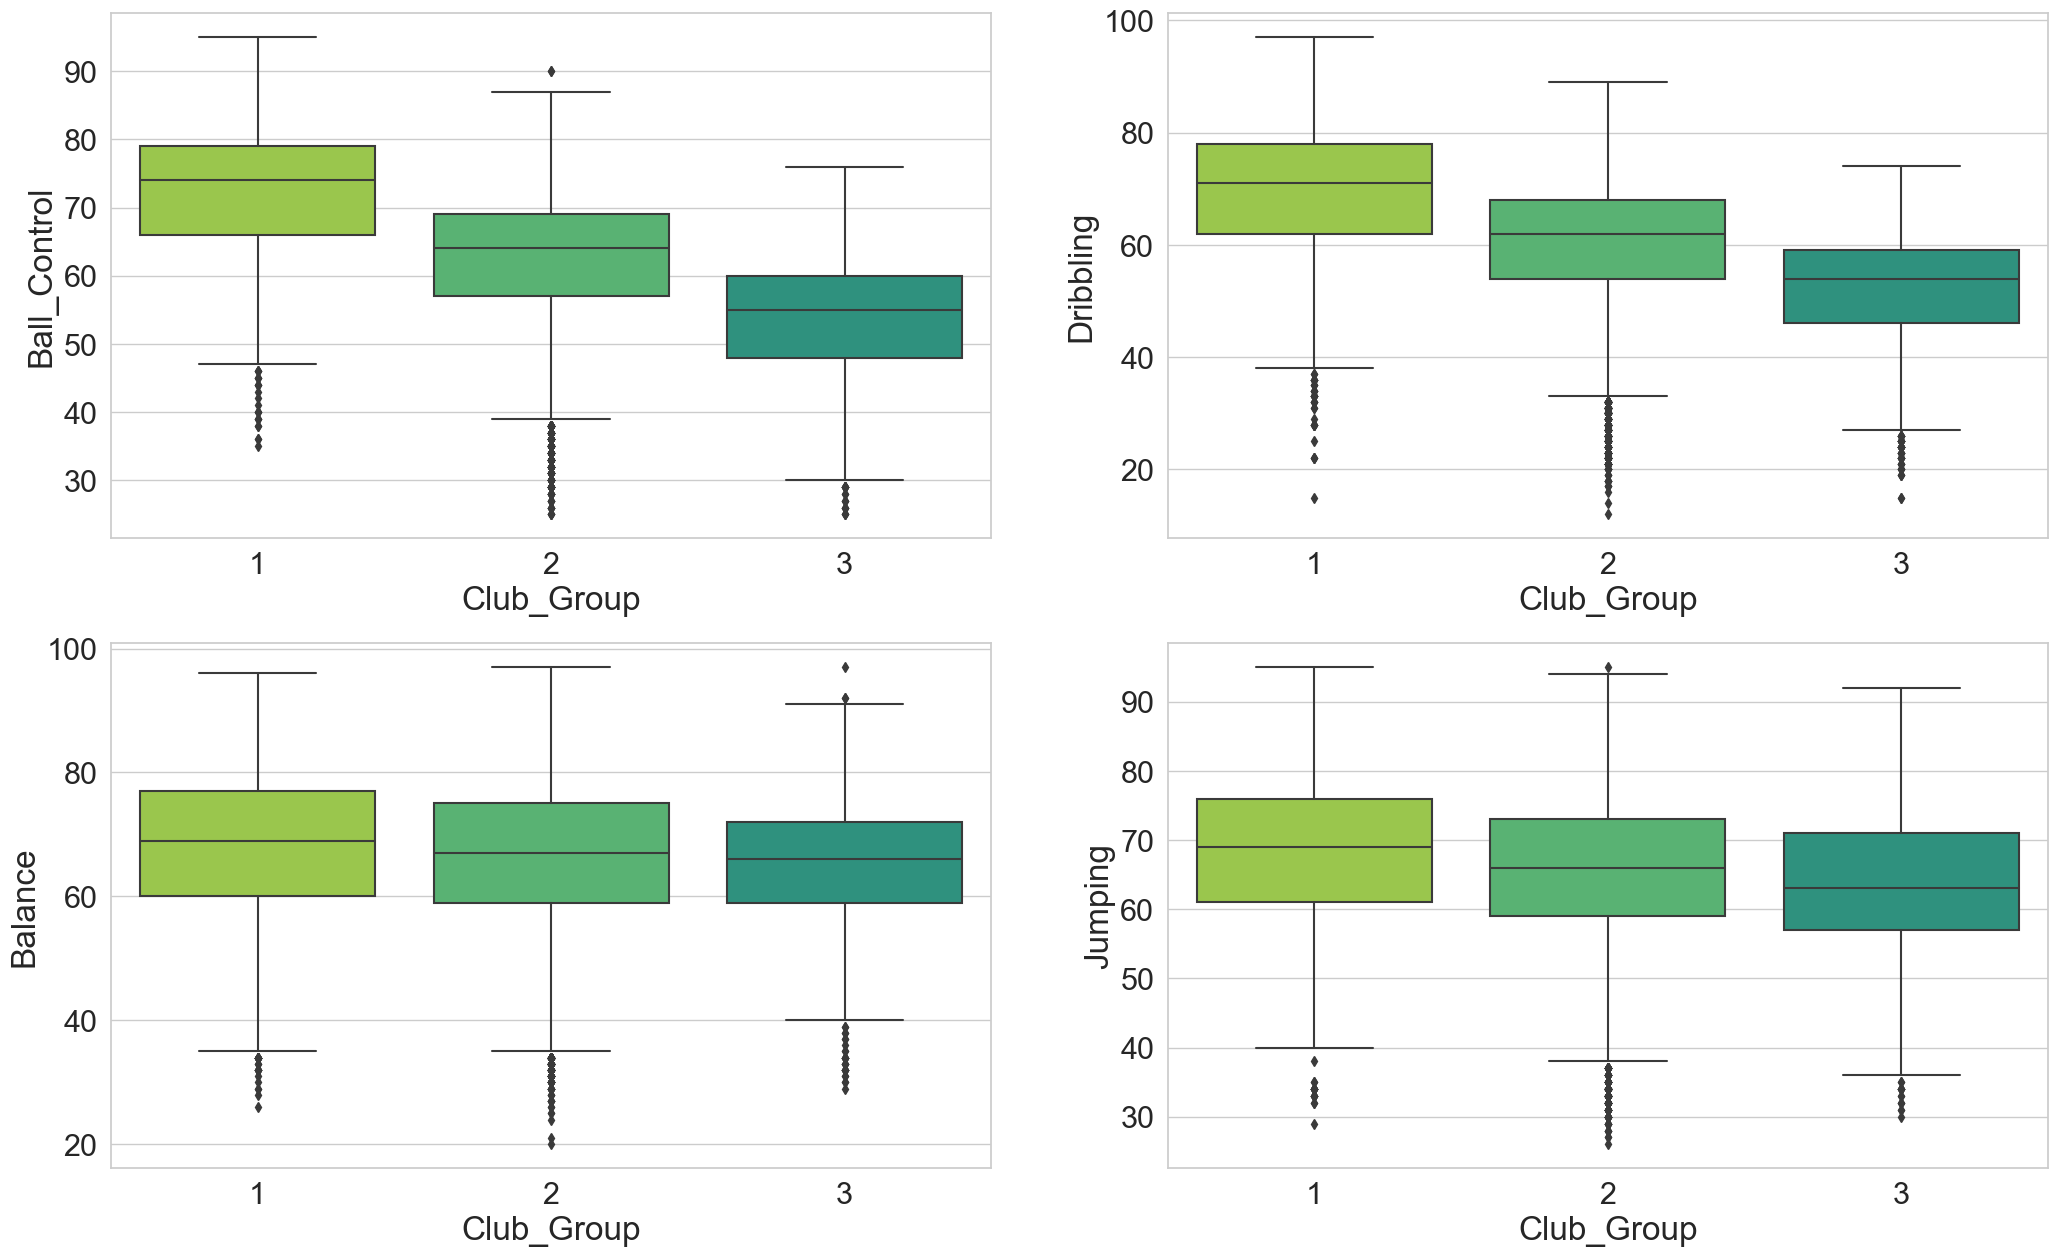

In [15]:
not_GK = FIFA[FIFA['Preffered_Position'] != 'GK']

fig, ax = plt.subplots(2, 2, figsize=(25, 15))
sns.boxplot(data=not_GK, x='Club_Group', y='Ball_Control', ax=ax[0, 0])
sns.boxplot(data=not_GK, x='Club_Group', y='Dribbling', ax=ax[0, 1])
sns.boxplot(data=not_GK, x='Club_Group', y='Balance', ax=ax[1, 0])
sns.boxplot(data=not_GK, x='Club_Group', y='Jumping', ax=ax[1, 1])

Although it is established that the teams of group 1 are better than those of group 2, which are better than those of group 3, the previous boxplots reveal that a specific set of skills creates this demarcation (ball control and dribbling for instance), while for others skills, the teams seems to have approximately the same level, regardless the different groups (balance, jumping, etc.). Identifying these would likely allow low-ranking teams to better focus their efforts to achieve higher levels of performance.